In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [3]:
# Load the CSV file
df = pd.read_csv('../Data/COCO COLA.csv')

In [4]:
# Sort data by date
df = df.sort_values(by="Date")

In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=15096, step=1)

Exploratory Data Analysis(EDA)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15096 entries, 0 to 15095
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15096 non-null  object 
 1   Open       15096 non-null  float64
 2   High       15096 non-null  float64
 3   Low        15096 non-null  float64
 4   Close      15096 non-null  float64
 5   Adj Close  15096 non-null  float64
 6   Volume     15096 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 825.7+ KB
None


In [8]:
df.index

RangeIndex(start=0, stop=15096, step=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15096 entries, 0 to 15095
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15096 non-null  object 
 1   Open       15096 non-null  float64
 2   High       15096 non-null  float64
 3   Low        15096 non-null  float64
 4   Close      15096 non-null  float64
 5   Adj Close  15096 non-null  float64
 6   Volume     15096 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 825.7+ KB


In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,15096.000000,15096.000000,15096.000000,15096.000000,15096.000000,1.509600e+04
mean,16.056202,16.188428,15.921876,16.060734,11.367487,9.032904e+06
std,16.939301,17.064336,16.811753,16.941712,14.253637,7.935744e+06
min,0.192708,0.193359,0.182292,0.192057,0.037855,7.680000e+04
25%,0.860677,0.869792,0.854167,0.860352,0.242312,2.812800e+06
50%,9.328125,9.398438,9.218750,9.351562,4.642848,7.585200e+06
75%,28.875000,29.167500,28.563125,28.901562,17.251080,1.291275e+07
max,59.810001,60.130001,59.619999,60.130001,58.650002,1.241690e+08


In [11]:
#checking for any null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

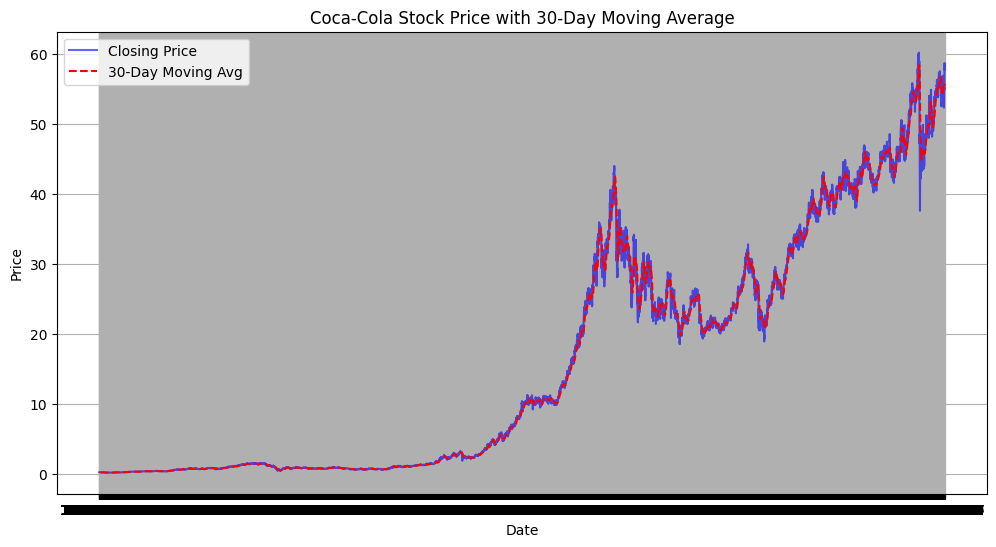

In [12]:
# Moving Average (e.g., 30-day)
df["30-Day MA"] = df["Close"].rolling(window=30).mean()
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"], label="Closing Price", color="blue", alpha=0.6)
plt.plot(df["Date"], df["30-Day MA"], label="30-Day Moving Avg", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Coca-Cola Stock Price with 30-Day Moving Average")
plt.legend()
plt.grid()
plt.show()

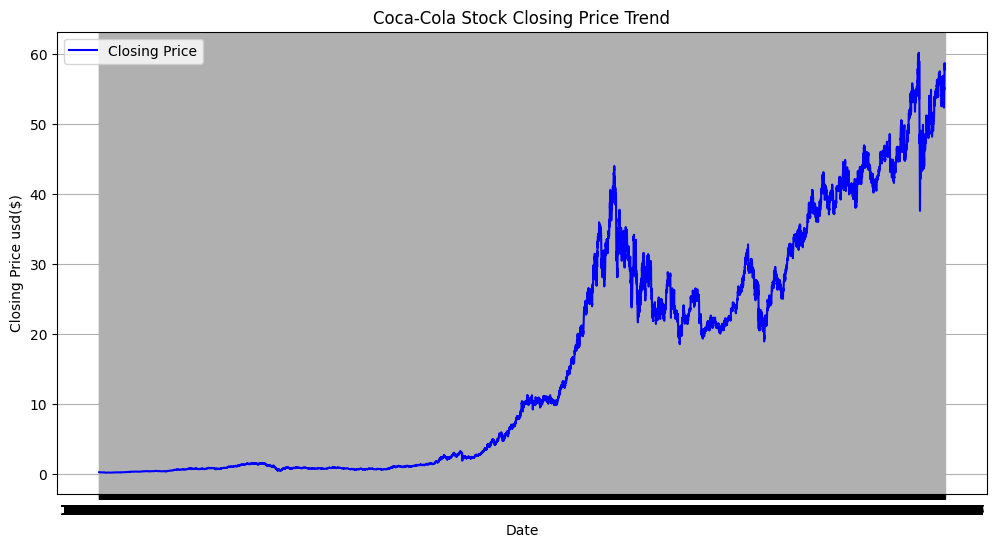

In [13]:
# Plotting Closing Price Trend
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"], label="Closing Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Closing Price usd($)")
plt.title("Coca-Cola Stock Closing Price Trend")
plt.legend()
plt.grid()
plt.show()


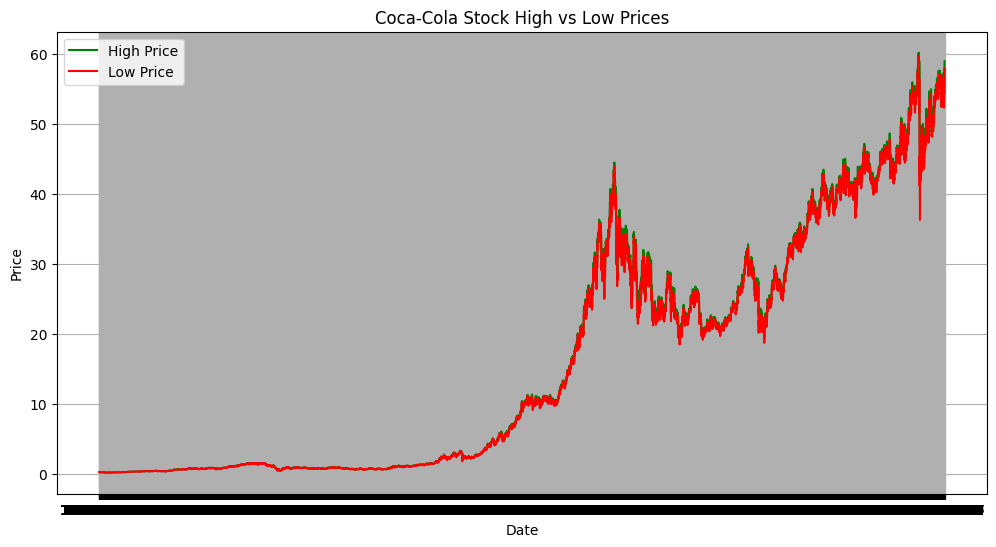

In [14]:
# High vs Low Prices
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["High"], label="High Price", color="green")
plt.plot(df["Date"], df["Low"], label="Low Price", color="red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Coca-Cola Stock High vs Low Prices")
plt.legend()
plt.grid()
plt.show()

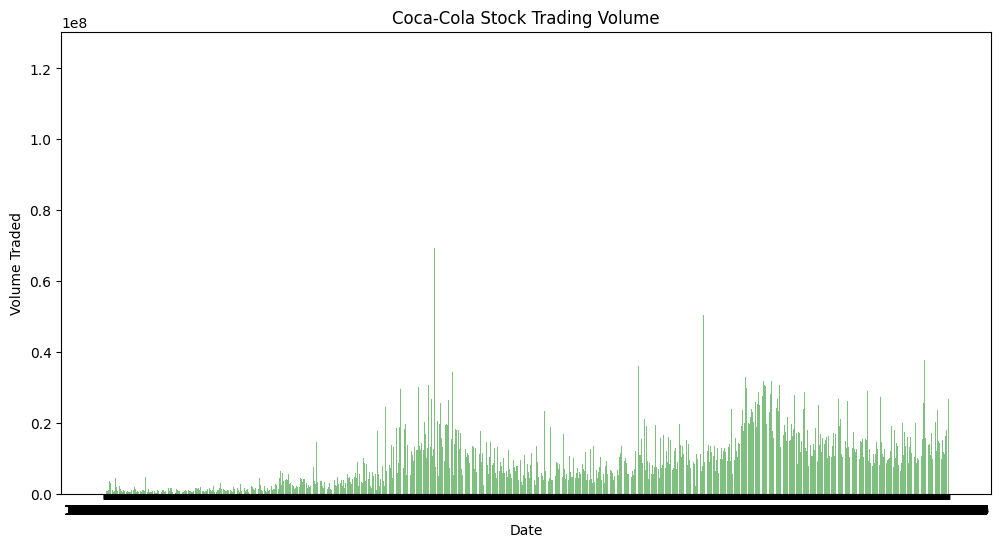

In [15]:
# Volume Traded Over Time
plt.figure(figsize=(12,6))
plt.bar(df["Date"], df["Volume"], color="green", alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Volume Traded")
plt.title("Coca-Cola Stock Trading Volume")
plt.show()

In [16]:
# Using the 'Close' column for prediction of Sales
data = df.filter(['Close'])
dataset = data.values

LSTM Model

In [17]:
# Scaling data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [18]:
# Splitting the data into sets for training and testing:
train_size = int(len(dataset) * 0.8)
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size - 60:, :]

# Preparing the data for LSTM model
def create_dataset(data, look_back=60):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 60
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)
     


In [19]:
# Reshaping the inputs to be in  [samples, time steps, features] for LSTM Model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
     

In [20]:
# training lstm model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))
     

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, batch_size=1, epochs=1)

12016/12016 ━━━━━━━━━━━━━━━━━━━━ 259s 21ms/step - loss: 3.9279e-04


In [22]:
# evaluating results
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

rmse = np.sqrt(np.mean(((lstm_predictions - y_test) ** 2)))
print('LSTM Model RMSE:', rmse)

95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step  
LSTM Model RMSE: 41.22640446675957


Visualizing Results for LSTM Model

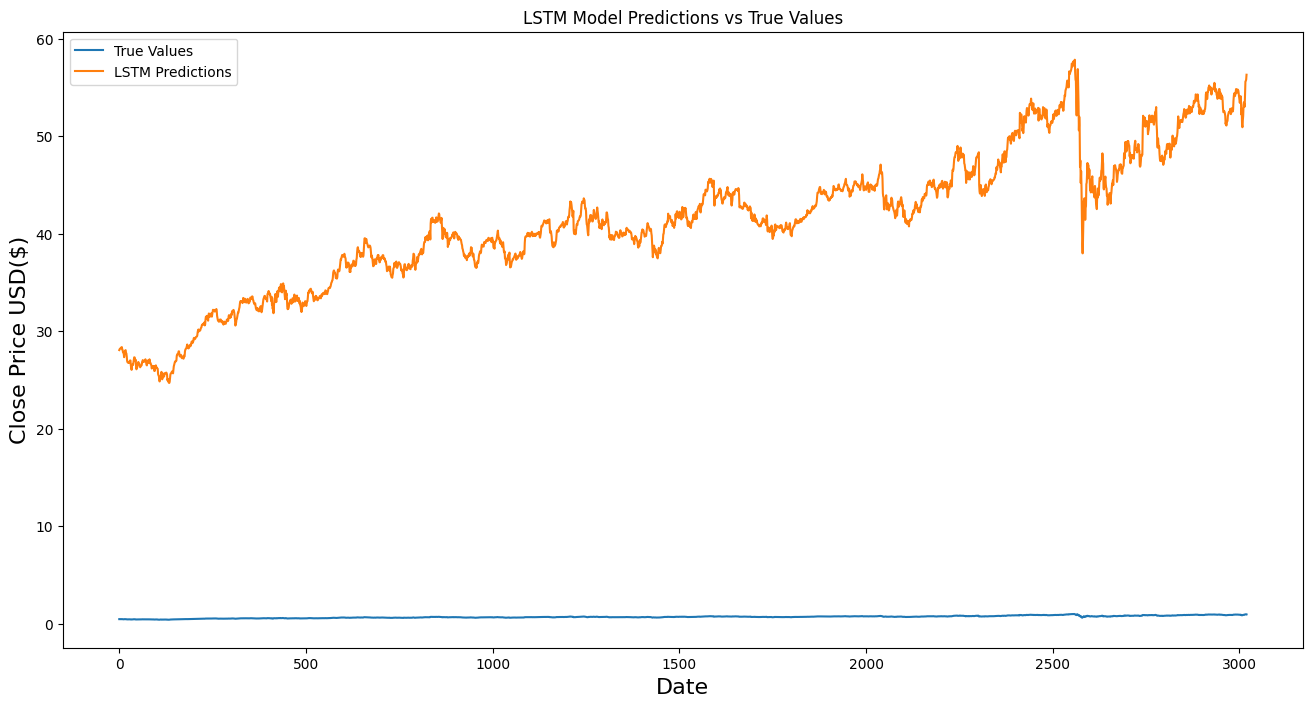

In [23]:
plt.figure(figsize=(16,8))
plt.title('LSTM Model Predictions vs True Values')
plt.plot(y_test, label='True Values')
plt.plot(lstm_predictions, label='LSTM Predictions')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD($)', fontsize=16)
plt.legend()
plt.show()
     


Random Forest Regressor model

In [24]:
# Preparing the data for Random Forest Regressor model
X = data.index.values.reshape(-1, 1)
y = data['Close'].values

In [25]:
# Splitting the data into sets for training and testing:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Training the Random Forest Regressor Model
rfr_model = RandomForestRegressor(n_estimators=100)
rfr_model.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
# Predicting and evaluating the Random Forest model
rfr_predictions = rfr_model.predict(X_test)
rfr_rmse = np.sqrt(mean_squared_error(y_test, rfr_predictions))
print('Random Forest Model RMSE:', rfr_rmse)

Random Forest Model RMSE: 15.620666069018439


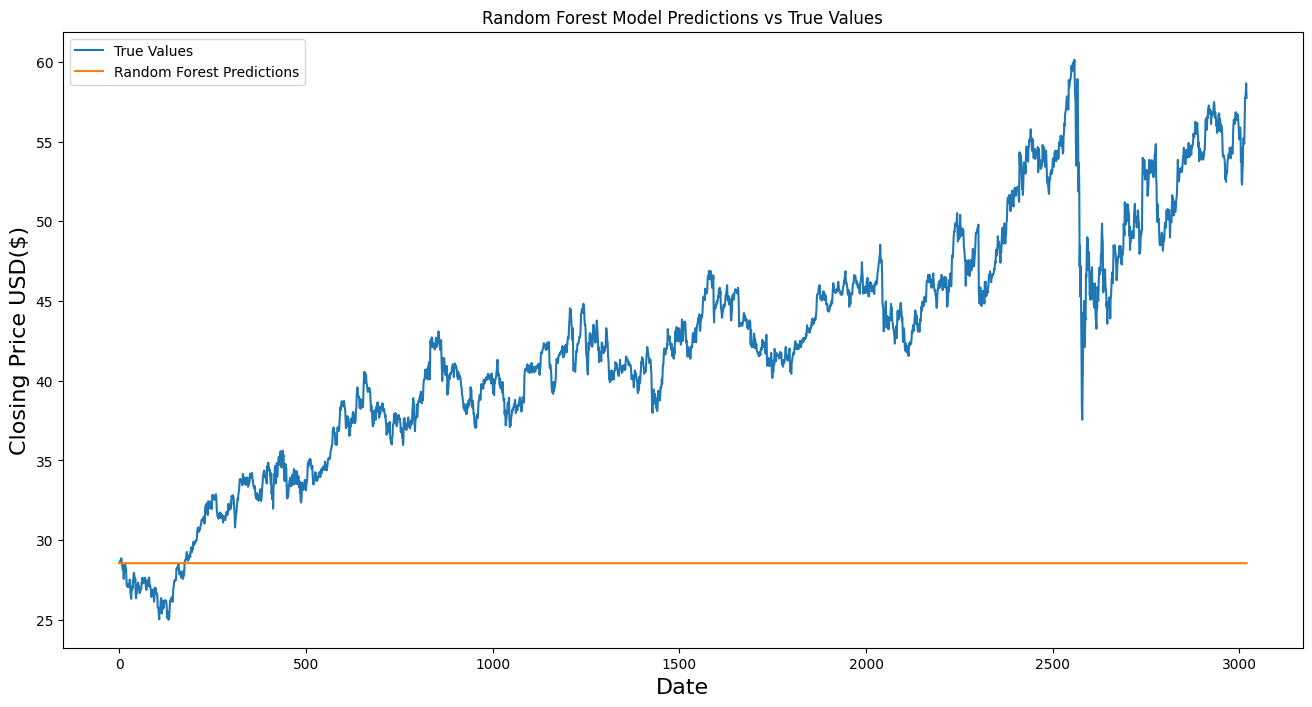

In [27]:
# Visualizing Results for Random Forest Model:
plt.figure(figsize=(16,8))
plt.title('Random Forest Model Predictions vs True Values')
plt.plot(y_test, label='True Values')
plt.plot(rfr_predictions, label='Random Forest Predictions')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Closing Price USD($)', fontsize=16)
plt.legend()
plt.show()

SGD Regressor Model

In [29]:
# Preparing the data for SGD Regressor model
X = data.index.values.reshape(-1, 1)
y = data['Close'].values

In [30]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [31]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Training the SVR Model
svr_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_model.fit(X_train_scaled, y_train)

SVR(C=1000.0, gamma=0.1)

In [33]:
# Predicting and evaluating the SVR model
svr_predictions = svr_model.predict(X_test_scaled)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_predictions))
print('SVR Model RMSE:', svr_rmse)

SVR Model RMSE: 59.73867456626801


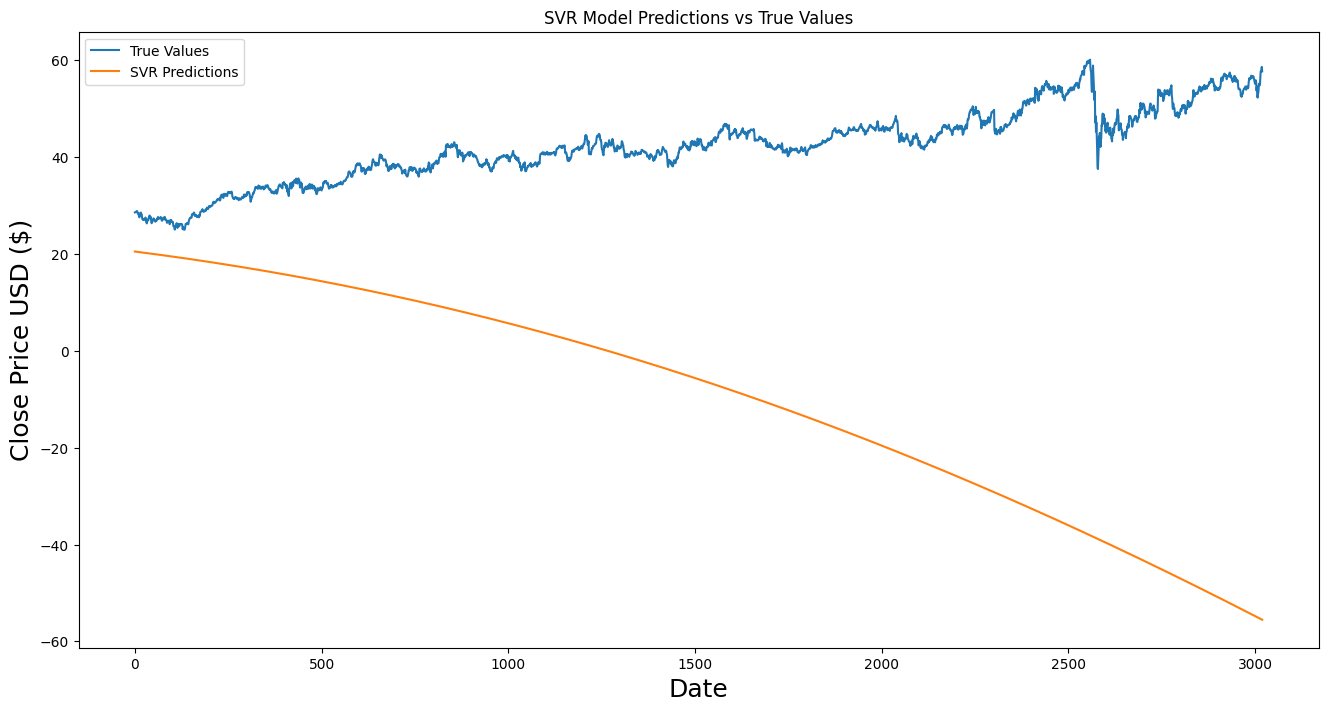

In [34]:
# Visualizing the Results for SVR
plt.figure(figsize=(16,8))
plt.title('SVR Model Predictions vs True Values')
plt.plot(y_test, label='True Values')
plt.plot(svr_predictions, label='SVR Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()